In [313]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


def mental_health_visualization():
    mental_health_df = pd.read_csv("cleaned_mental_health_data.csv")
    new_mh_data= mental_health_df.drop(mental_health_df.columns[0], axis=1)

    filtered_df = new_mh_data[new_mh_data['Growing_Stress'] != 2]
    print(filtered_df['Growing_Stress'].value_counts())
    return filtered_df

mental_health_df = mental_health_visualization()


Growing_Stress
1    97854
0    91083
Name: count, dtype: int64


In [314]:
mental_health_visualization()

Growing_Stress
1    97854
0    91083
Name: count, dtype: int64


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:37,0,34,3,0,0,0,1,1,0,1,2,0,0,1,2,1
1,8/27/2014 11:43,0,34,3,0,0,0,1,1,0,1,2,0,0,1,0,1
2,8/27/2014 11:49,0,25,3,0,0,0,1,1,0,1,2,0,0,1,2,2
3,8/27/2014 11:51,0,0,3,0,0,0,1,1,0,1,2,0,0,1,0,2
4,8/27/2014 11:52,0,34,3,0,0,0,1,1,0,1,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287157,7/27/2015 23:25,0,34,5,0,0,0,2,0,2,0,1,0,0,2,2,2
287158,8/17/2015 9:38,0,29,5,0,0,0,2,0,2,0,1,0,0,2,0,1
287159,8/25/2015 19:59,0,34,5,0,0,0,2,0,2,0,1,0,0,2,0,0
287160,9/26/2015 1:07,0,34,5,0,0,0,2,0,2,0,1,0,0,2,0,1


In [315]:
# Drop the maybes
# Create a histograms that shows the percentage of people that have stress per job

In [316]:
def pie_chart(mental_health_df):
    agg_growing_stress = mental_health_df.groupby('Growing_Stress').count()
    agg_growing_stress
    labels = ['no','yes']
    colors = ['pink','blue']
    agg_growing_stress.plot(kind='pie',y='Occupation',autopct = '%1.0f%%', colors =colors, labels= labels)


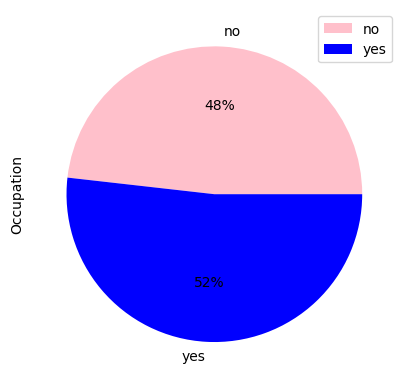

In [317]:
pie_chart(mental_health_df)

In [327]:
def mh_histo(mental_health_df):
    stress_counts = mental_health_df['Occupation'].value_counts()

   
    total_people = len(mental_health_df)
    stress_percentages = (stress_counts / total_people) * 100
    x = ['Housewife','Student','Corperate','Other','Business']

    # Create the histogram
    plt.bar(stress_percentages.index, stress_percentages.values)
    plt.xlabel("Occupation")
    plt.ylabel("Percentage of people who say their stress is increasing")
    plt.title("Percentage of People with Stress per Job")
    plt.xticks(stress_percentages.index, x ,rotation=45) 
    plt.grid(axis='y')  
    plt.tight_layout()  

    plt.show()
    

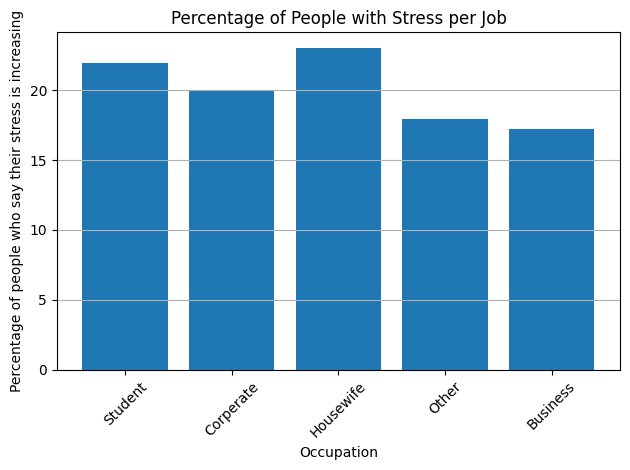

In [328]:
mh_histo(mental_health_df)

In [320]:
def basic_plot(mental_health_df):
   x = mental_health_df['Growing_Stress']
   y = mental_health_df['Occupation']  
   plt.plot(x, y,'.')    
   plt.xlabel('Growing Stress')  
   plt.ylabel('Occupation')  
   plt.title('Stress per Occupation')  
   plt.show()  

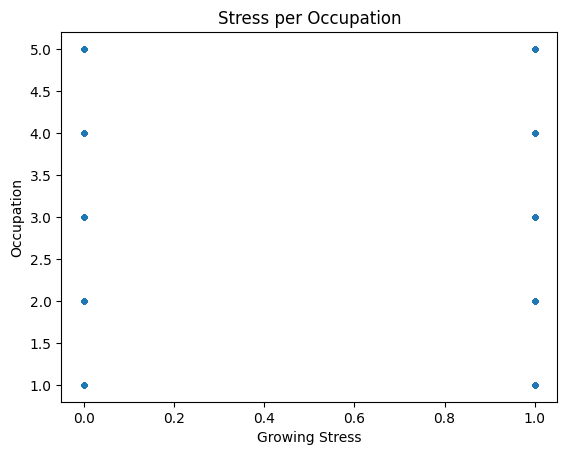

In [321]:
basic_plot(mental_health_df)

In [322]:
def logicstic_regression(mental_health_df):
    X = mental_health_df[['Occupation','self_employed']]
    y = mental_health_df['Growing_Stress']

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)
    
    sc = StandardScaler() 
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)

    regression = LogisticRegression(random_state=32)
    regression.fit(X_train, y_train)
   
   
    y_pred = regression.predict(X_test)
    y_pred
    print(regression.score(X_test,y_test))
    ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

    rf = RandomForestClassifier(n_estimators=100, random_state=32)
    rf = rf.fit(X_train, y_train)
    print(rf.score(X_test, y_test))
    ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

0.5322059913199958
0.5514184397163121


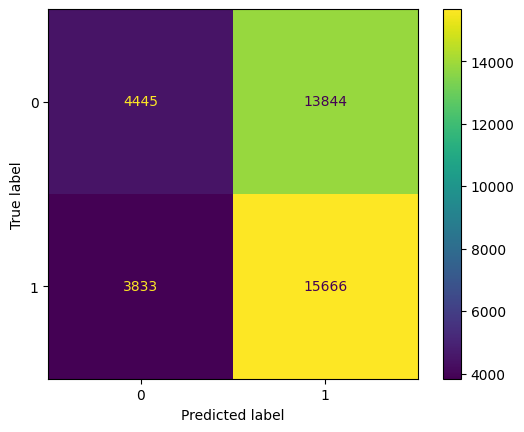

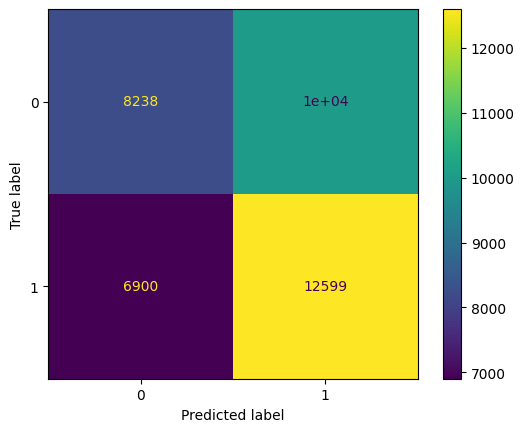

In [323]:
logicstic_regression(mental_health_df)

In [324]:
15666/(15666+3833)

0.8034258167085492

In [325]:
12599/(12599+6900)

0.6461356992666291